In [2]:
import os
import json
import string
import pandas as pd
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords 

In [3]:
data = pd.read_csv("D:/Text_Mining/Day2/Day2_workshop/articles.csv")
print(data.columns)
data.head(2)

Index(['Unnamed: 0', 'category', 'title', 'author', 'date', 'read_time',
       'shares', 'content'],
      dtype='object')


,Unnamed: 0,category,title,author,date,read_time,shares,content
0,0,technology,From Clockworks to Computers on Our Wrists,Adrian Zumbrunnen,Sep 20,8 min read,8600.0,Image courtesy of the author.Image courtesy of...
1,1,technology,A Modest Privacy Protection Proposal,Jameson Lopp,Sep 29,31 min read,3800.0,Photo: Bernard Hermant/UnsplashPhoto: Bernard ...


In [4]:
data['category'].unique()

array(['technology', 'design', 'culture', 'politics', 'entrepre',
       'science', 'self', 'popular'], dtype=object)

In [5]:
group_by_category = data.groupby(by=['category'])
data_avg = group_by_category.mean()
data_avg


,Unnamed: 0,shares
category,,
culture,4283.0,1030.625968
design,2795.5,1762.658416
entrepre,8406.0,1358.711089
politics,6777.0,500.257367
popular,13368.0,11350.933695
science,9564.5,843.105305
self,11370.5,1706.276770
technology,1346.5,1343.112608


In [6]:
data_count = group_by_category.count()
data_count

,Unnamed: 0,title,author,date,read_time,shares,content
category,,,,,,,
culture,2771,2756,2771,2771,2766,2711,2762
design,204,204,204,204,204,202,203
entrepre,1041,1041,1041,1041,1039,1028,1041
politics,2217,2214,2217,2217,2210,2036,2213
popular,1659,1651,1659,1659,1659,1659,1653
science,1276,1276,1276,1276,1274,1263,1276
self,2336,2330,2336,2336,2333,2316,2335
technology,2694,2689,2694,2694,2694,2673,2693


In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
data = data[data['category'] != 'popular']
data = data[data['category'] != 'design']


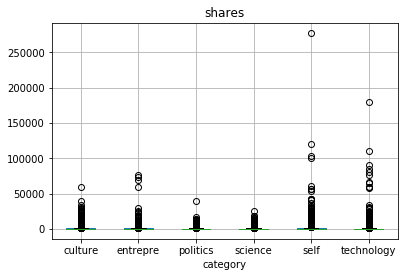

In [74]:
data.boxplot(column="shares",by="category")
plt.ylabel("")
plt.suptitle("")
plt.show()

In [10]:
data.isnull().sum()

Unnamed: 0      0
category        0
title          37
author          0
date            0
read_time      19
shares        310
content        22
dtype: int64

C:\Users\Keerthana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


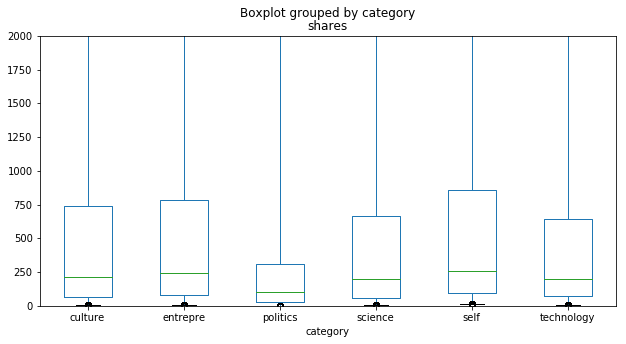

In [47]:
axes = data.boxplot(column='shares',by='category', figsize=(10,5),
                   whis=[5,95],grid='False')
plt.ylim(0,2000)
#plt.title("Boxplot of shares by category")
plt.show()

In [38]:
group_by_category = data.groupby(by=['author'])
data_avg = group_by_category.mean()
top_authors = data_avg.shares.sort_values(ascending=False)
top = top_authors[1:10] 

In [97]:
group_by_category = data.groupby(by=['author'])
data_count = group_by_category.count()
data_count.title.sort_values(ascending=False)


author
Popular Science            220
The New York Times         197
Bloomberg                  194
MIT Technology Review      147
Fast Company               137
The Financial Times        136
The Economist              122
Rolling Stone              110
umair haque                103
Washington Post            103
Forbes                      97
Ethan Siegel                92
inc. magazine               81
The Guardian                76
Bloomberg View              73
New York Times Magazine     69
Future Human                69
Great Escape                66
ACLU National               64
Foreign Policy              64
Yitzi Weiner                63
Lance Ulanoff               60
The Edge of Adulthood       56
The Atlantic                56
Miles Klee                  52
PCMag                       52
Kris Gage                   50
Zat Rana                    46
Ezinne Ukoha                45
Michael K. Spencer          42
                          ... 
Maritta Katerelou            1
M

In [14]:
authors_data = data.groupby('author')\
                .agg({'title':'count','shares':'mean'})\
                .rename(columns={'title':'Count','shares':'Average'})\
                .reset_index()


In [15]:
sort_authors = authors_data.sort_values('Average',ascending=False)
sort_authors[1:10]

,author,Count,Average
2292,James Bridle,1,172000.0
1355,David Hopkins,1,171000.0
89,Adam Wathan & Steve Schoger,1,164000.0
4438,Richard Reis,1,135000.0
5336,Tristan Harris,2,111000.0
2697,Jonathan Solórzano-Hamilton,1,111000.0
865,CamMi Pham,2,104000.0
4712,Scott Riddle,1,104000.0
959,Charles Scalfani,2,91000.0


In [114]:
sort_count_authors = authors_data.sort_values('Count',ascending=False)
sort_count_authors[1:10]

,author,Count,Average
5155,The New York Times,197,361.807107
703,Bloomberg,194,240.948187
3332,MIT Technology Review,147,818.625850
1809,Fast Company,137,347.135338
5128,The Financial Times,136,603.154412
5124,The Economist,122,893.073770
4510,Rolling Stone,110,374.254545
5480,Washington Post,103,1122.126214
5726,umair haque,103,4597.766990
